In [1]:
import yaml
import argparse
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def generate_matrices(file_path):
    # Read the YAML file
    with open(file_path, 'r') as file:
        data = yaml.load(file, Loader=yaml.CBaseLoader)
    
    # Extract grid dimensions
    width = int(data['width'])
    height = int(data['height'])
    print(width, height)
    # Initialize the matrices to record appearances and waits
    appearances_matrix = np.zeros((height, width))
    wait_matrix = np.zeros((height, width))
    data = data['schedule']
    # Process the movement data
    for agent_key in data.keys():
        # print(agent_key)
        if agent_key.startswith('agent'):
            previous_position = None
            for movement in data[agent_key]:
                
                # Adjust the coordinates
                x = max(0, min(width - 1, int(movement["y"]) - 1))
                y = max(0, min(height - 1, height - int(movement["x"])))
                
                # Increment the appearance count
                appearances_matrix[y, x] += 1
                
                # Check for waiting and increment the wait count
                if previous_position == (x, y):
                    wait_matrix[y, x] += 1
                
                # Update the previous position
                previous_position = (x, y)
    
    return appearances_matrix, wait_matrix, width, height





In [42]:
# Generate matrices and plot for each input file
appearance_matrices = []
wait_matrices = []
inputs = ["visual_withcache_multi3.yaml", "visual_withcache_single3.yaml", "visual_withoutcache_multi3.yaml", "visual_withoutcache_single3.yaml"]
# inputs = ["visual_withcache_multi2.yaml"]
for input_path in inputs:
    appearances, waits, width, height = generate_matrices(input_path)
    appearance_matrices.append(appearances)
    wait_matrices.append(waits)

71 27
71 27
71 27
71 27


In [43]:
def plot_matrix(matrix, width, height, output_path, colorbar_label):
    # Set up the figure for subplots
    fontsize=30
    fig, axs = plt.subplots(1, 4, figsize=(36, 8))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05)
    # Create the heatmaps for each input file
    titles = ["CAL-MAPF Multi-Port", "CAL-MAPF Single-Port", "Baseline Multi-Port", "Baseline Single-Port"]
    for i, ax in enumerate(axs):
        cax = ax.imshow(matrix[i], cmap='RdPu', aspect='auto', origin='lower')
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax.tick_params(axis='y', which='both', left=False, labelleft=False)
        ax.set_yticks(range(0, height, max(1, height // 10)), fontsize=fontsize)
        ax.set_xlabel(titles[i], fontsize=fontsize)
    # Position for the colorbar
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.91, 0.02, 0.01, 0.96])
    cbar = fig.colorbar(cax, cax=cbar_ax, label=colorbar_label)
    cbar.ax.tick_params(labelsize=fontsize) 
    cbar.set_label(colorbar_label, fontsize=fontsize)

    # plt.show()
    plt.savefig(output_path, bbox_inches='tight')

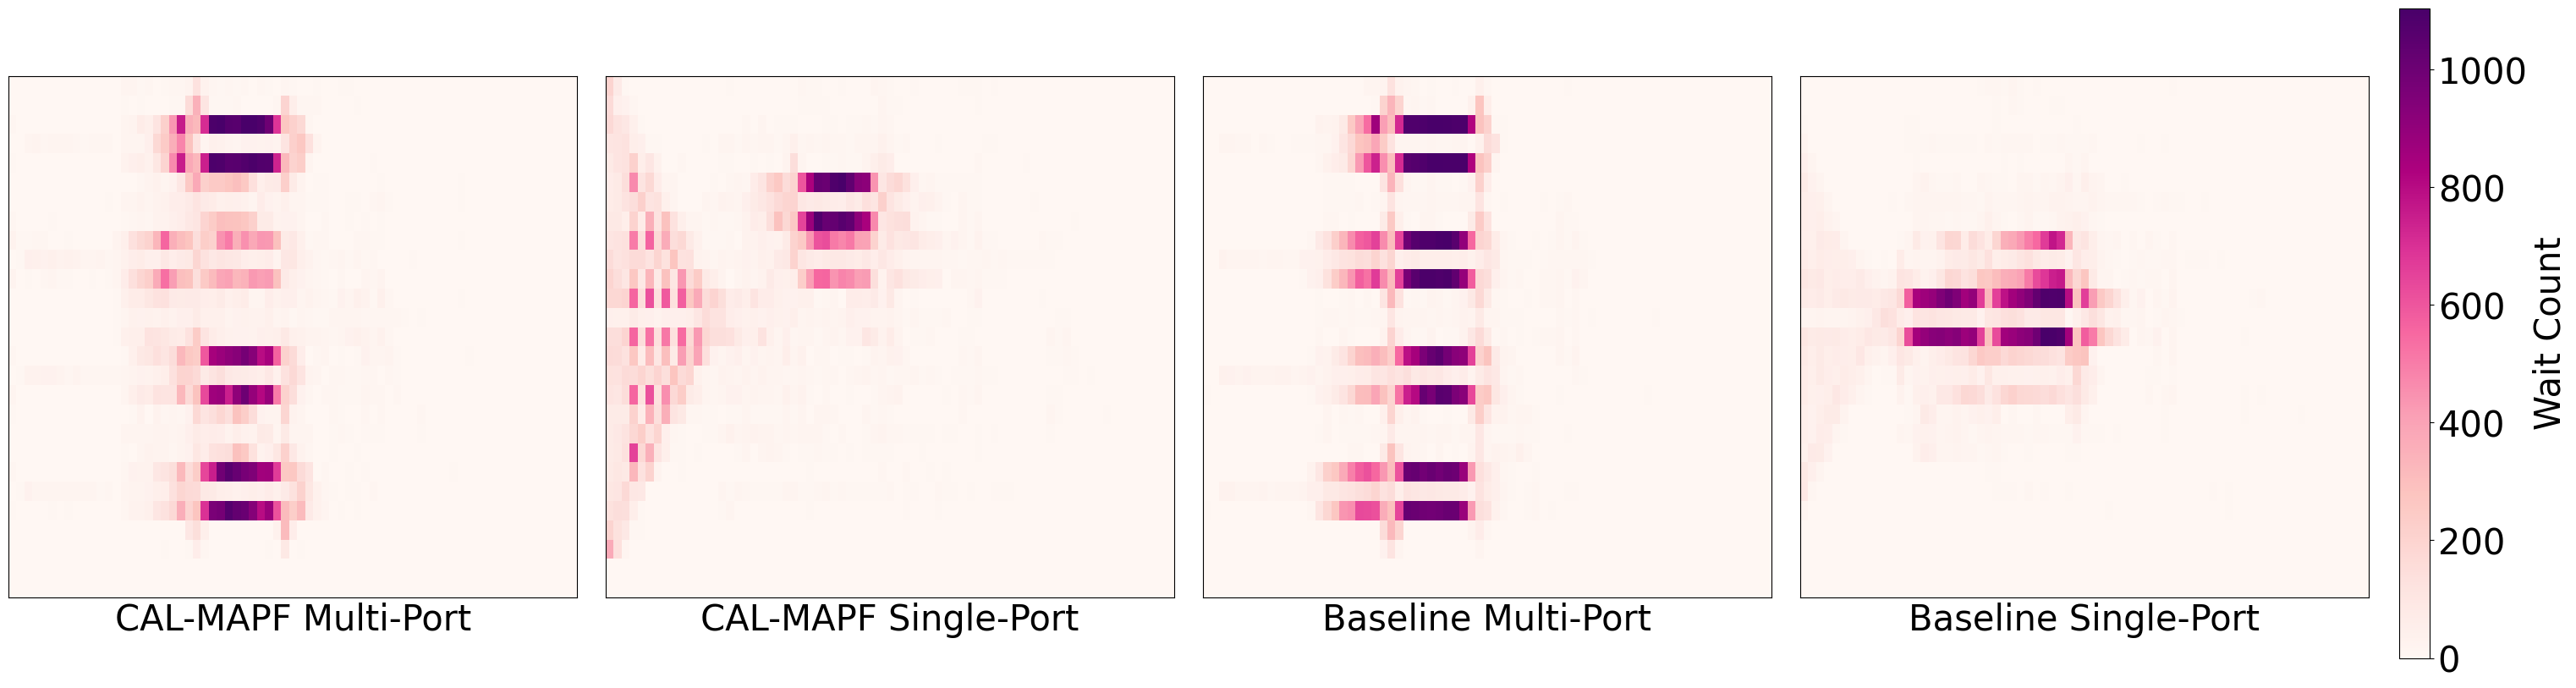

In [44]:
# plot_matrix(appearance_matrices, width, height, "HeatMaps.pdf", 'Appearance Count')
plot_matrix(wait_matrices, width, height, "WaitMaps.pdf", 'Wait Count')